In [ ]:
a = 'Hello, heatwaves!'

print(a)

Hello, heatwaves!


## Предобработка

1) импорт данных

In [1]:
import pandas as pd

# Чтение данных
ekb = pd.read_csv('/content/ekaterinburg_PET.csv', sep = ";", decimal=",")
krasnodar = pd.read_csv('/content/krasnodar_PET.csv', sep = ";", decimal=",")
moscow = pd.read_csv('/content/moscow_PET.csv', sep = ";", decimal=",")
spb = pd.read_csv('/content/spb_PET.csv', sep = ";", decimal=",")
novosibirsk = pd.read_csv('/content/novosibirsk_PET.csv', sep = ";", decimal=",")
vladivostok = pd.read_csv('/content/vladivostok_PET.csv', sep = ";", decimal=",")

# Создадим новую колонку с названием города и избавимся от лишных колонок
ekb["City"] = "Екатеринбург"
ekb = ekb[['City', 'Date_2', 'PET']]

krasnodar["City"] = "Краснодар"
krasnodar = krasnodar[['City', 'Date_2', 'PET']]

moscow["City"] = "Москва"
moscow = moscow[['City', 'Date_2', 'PET']]

spb["City"] = "Санкт-Перербург"
spb = spb[['City', 'Date_2', 'PET']]

novosibirsk["City"] = "Новосибирск"
novosibirsk = novosibirsk[['City', 'Date_2', 'PET']]

vladivostok["City"] = "Владивосток"
vladivostok = vladivostok[['City', 'Date_2', 'PET']]


# объединим таблицы
all_cities = pd.concat([ekb, krasnodar, moscow, spb, novosibirsk, vladivostok])

# Поправим тип данных для колонки с датами и сохраним в новую колонку,
# а старую удалим
all_cities["Date"] = pd.to_datetime(all_cities["Date_2"])
all_cities = all_cities[['City', 'Date', 'PET']]

# Добавим еще одну колонку, куда запишем просто год
all_cities['Year'] = pd.DatetimeIndex(all_cities['Date']).year

# Удалим дубликаты
all_cities = all_cities.drop_duplicates(keep='first')
all_cities.info()

<ipython-input-1-306706e25d31>:38: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  all_cities["Date"] = pd.to_datetime(all_cities["Date_2"])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36720 entries, 0 to 6256
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    36720 non-null  object        
 1   Date    36720 non-null  datetime64[ns]
 2   PET     36720 non-null  float64       
 3   Year    36720 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ MB


2) проверить данные на выбросы, для этого можно построить простые гистограммы всех значений для каждого города

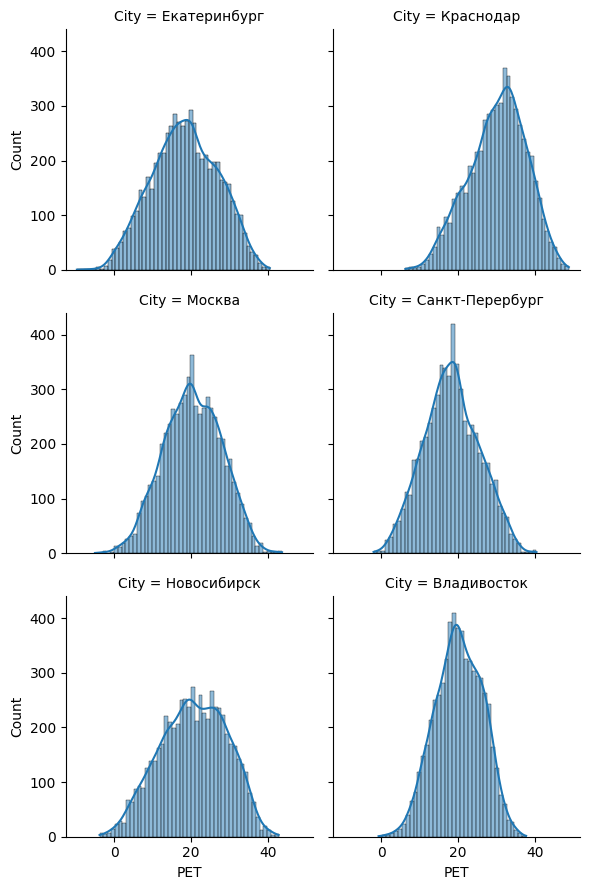

In [2]:
import seaborn as sns

g = sns.FacetGrid(all_cities,
                  col='City',                # facet col variable
                  col_wrap=2,                # define nbr of subplots per row
                  sharex=True, sharey=True   # Define which axes are shared
                 )
g.map(sns.histplot, 'PET', kde=True,
      binwidth=1                             # Width of each bin
     )


3) разметить данные, категоризовав асолютные значения по уровням термического стресса / по порогу термического стресса

In [3]:
bins =  [-10, 4, 8, 13, 18, 23, 29, 35, 41, 100]
labels = ['extreme cold stress', 'strong cold stress', 'moderate cold stress',
          'slight cold stress', 'no thermal stress', 'slight heat stress',
          'moderate heat stress', 'strong heat stress', 'extreme heat stress']
all_cities['Thermal_stress'] = pd.cut(all_cities['PET'], bins = bins, labels = labels)
all_cities.head()

City       Date        PET  Year      Thermal_stress
0  Екатеринбург 1979-01-05  18.500000  1979   no thermal stress
1  Екатеринбург 1979-02-05  25.900000  1979  slight heat stress
2  Екатеринбург 1979-03-05  27.500000  1979  slight heat stress
3  Екатеринбург 1979-04-05  21.700001  1979   no thermal stress
4  Екатеринбург 1979-05-05  17.100000  1979  slight cold stress

4) рассчитаем количество значений каждой категории термического стресса для каждого года и каждого города и сохраним в новый датафрейм

In [5]:
all_cities_by_year = all_cities.groupby(['City', 'Year', 'Thermal_stress'], as_index=False).size()
all_cities_by_year

City  Year        Thermal_stress  size
0         Владивосток  1979   extreme cold stress     0
1         Владивосток  1979    strong cold stress     4
2         Владивосток  1979  moderate cold stress    11
3         Владивосток  1979    slight cold stress    32
4         Владивосток  1979     no thermal stress    52
...               ...   ...                   ...   ...
2155  Санкт-Перербург  2018     no thermal stress    43
2156  Санкт-Перербург  2018    slight heat stress    37
2157  Санкт-Перербург  2018  moderate heat stress    21
2158  Санкт-Перербург  2018    strong heat stress     1
2159  Санкт-Перербург  2018   extreme heat stress     0

[2160 rows x 4 columns]

In [19]:
#запишем новую таблицу в отдельный файл
all_cities_by_year.to_csv('content\all_cities_by_year.csv')
all_cities_by_year.iloc [[1450]]


City  Year      Thermal_stress  size
1450  Новосибирск  1980  strong cold stress     3